<a href="https://colab.research.google.com/github/sakshiigdtuw/AWS-ML-Project/blob/main/AWS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns

from prophet import Prophet

Data Collection & processing

Dataset [Air pollution data of india 2020-2023](https://www.kaggle.com/datasets/seshupavan/air-pollution-data-of-india-2020-2023)

In [2]:
data = pd.read_csv('/content/air_pollution_data.csv')

In [3]:
data.head() #print top 5 rows of dataset

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53


In [6]:
data.tail() #last 5 rows

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
23499,Visakhapatnam,21-05-2023,3,353.81,0.0,2.08,100.14,4.11,37.53,47.09,0.08
23500,Visakhapatnam,22-05-2023,3,380.52,0.0,3.77,82.97,5.07,32.17,43.44,1.74
23501,Visakhapatnam,23-05-2023,3,390.53,0.0,4.28,80.11,5.19,36.01,48.06,1.20
23502,Visakhapatnam,24-05-2023,3,300.41,0.0,1.36,95.84,2.21,30.17,48.89,0.00
23503,Visakhapatnam,25-05-2023,4,427.25,0.0,6.00,88.69,10.73,52.36,61.41,0.20


In [8]:
data.shape

(23504, 11)

In [5]:
# check missing value
data.isnull().sum()


,0
city,0
date,0
aqi,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    23504 non-null  object 
 1   date    23504 non-null  object 
 2   aqi     23504 non-null  int64  
 3   co      23504 non-null  float64
 4   no      23504 non-null  float64
 5   no2     23504 non-null  float64
 6   o3      23504 non-null  float64
 7   so2     23504 non-null  float64
 8   pm2_5   23504 non-null  float64
 9   pm10    23504 non-null  float64
 10  nh3     23504 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


Data Analysis**(EDA)**

In [58]:
import plotly.express as px

fig = px.scatter(data,x='pm2_5',y='aqi')
fig.show()

In [52]:
fig_no2 = px.scatter(data,x='no2',y='aqi')
fig_no2.show()

In [53]:
fig_so2 = px.scatter(data,x='so2',y='aqi')
fig_so2.show()

In [55]:
fig_co = px.scatter(data,x='co',y='aqi')
fig_co.show()

Forecasting Model:**FB Prophet Algorihtm**

Regression Model

In [14]:
# converting the date from DD-MM-YYYY to YYYY-MM-DD

date_info = pd.to_datetime(data['date'])
date_info

<ipython-input-14-514987346472>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_info = pd.to_datetime(data['date'])


,date
0,2020-11-30
1,2020-12-01
2,2020-12-02
3,2020-12-03
4,2020-12-04
...,...
23499,2023-05-21
23500,2023-05-22
23501,2023-05-23
23502,2023-05-24


In [16]:
print(type(date_info))

<class 'pandas.core.series.Series'>


In [17]:
df = pd.DataFrame()

In [19]:
df['ds'] = pd.to_datetime(data['date'])
df['y'] = data['aqi']

<ipython-input-19-290269c5d1cf>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ds'] = pd.to_datetime(data['date'])


In [20]:
df.head()

,ds,y
0,2020-11-30,5
1,2020-12-01,5
2,2020-12-02,5
3,2020-12-03,5
4,2020-12-04,5


In [22]:
# Training prophet model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4fmtd6w6/s8rb2o2d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4fmtd6w6/9cjgjwg_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98003', 'data', 'file=/tmp/tmp4fmtd6w6/s8rb2o2d.json', 'init=/tmp/tmp4fmtd6w6/9cjgjwg_.json', 'output', 'file=/tmp/tmp4fmtd6w6/prophet_model0iu8t07j/prophet_model-20241127132053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:20:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:20:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1264,2024-05-20
1265,2024-05-21
1266,2024-05-22
1267,2024-05-23
1268,2024-05-24


In [28]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1264,2024-05-20,2.199112,0.559178,3.709299
1265,2024-05-21,2.307362,0.865941,3.935920
1266,2024-05-22,2.289880,0.634949,3.903611
1267,2024-05-23,2.312448,0.887529,3.871147
1268,2024-05-24,2.295154,0.723752,3.859378


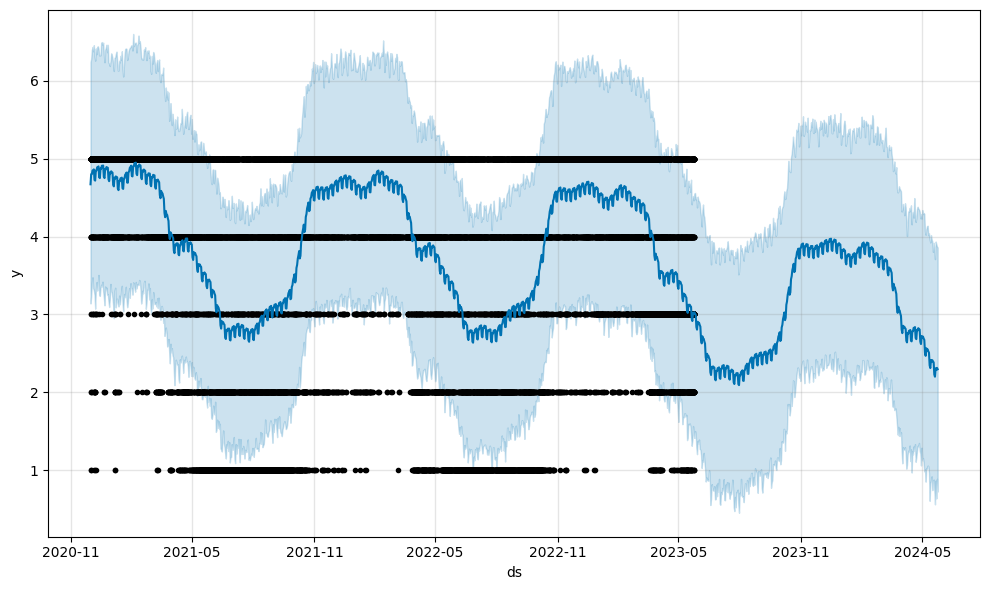

In [29]:
fig1 = model.plot(forecast)

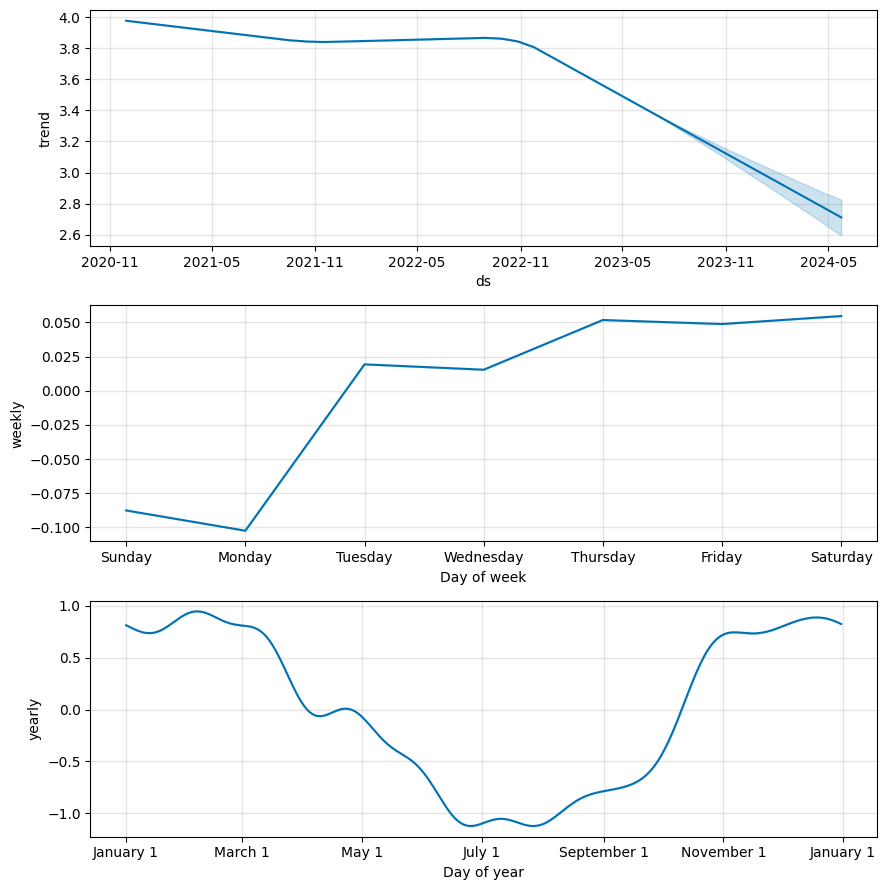

In [30]:
fig2 = model.plot_components(forecast)



In [34]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [32]:
plot_components_plotly(model, forecast)

/usr/local/lib/python3.10/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.

